In [1]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
    """
    Cria um dataset para regressão com função geradora com
    inclinação e interceptação do eixo vertical parametrizados.
    """
    X = np.random.uniform(size=(n,1))
    AUX = np.random.rand(n,1)-0.5
    y = X*slop+intercept + AUX*0.1
    y = y.flatten()
    return X, y

slop = 0.5
intercept = 0.2
Xtr, ytr = criaDatasetRegressão(n=20, slop=slop, intercept=intercept)
Xtr.T, ytr.T

(array([[0.34068832, 0.60868575, 0.16866962, 0.05371526, 0.67056222,
         0.15840858, 0.40549447, 0.38305986, 0.20377154, 0.8519518 ,
         0.94780849, 0.74302851, 0.75553491, 0.02303264, 0.66090233,
         0.91136976, 0.81857797, 0.1856806 , 0.88194805, 0.11497518]]),
 array([0.40546644, 0.48871599, 0.31756978, 0.2206867 , 0.49510585,
        0.27593724, 0.37223173, 0.39720486, 0.28801203, 0.64554889,
        0.62728088, 0.57177182, 0.56747561, 0.21049075, 0.53106867,
        0.62083339, 0.61669349, 0.26489364, 0.66342219, 0.30557087]))

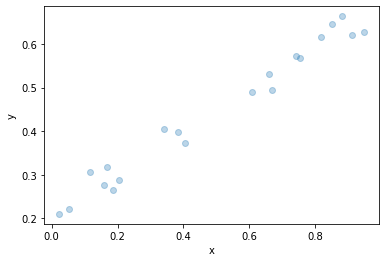

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetRegressão(X, y):
    """
    Plota um dataset de regressão.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:,0], y, "o", alpha=0.3)

plotaDatasetRegressão(Xtr, ytr)

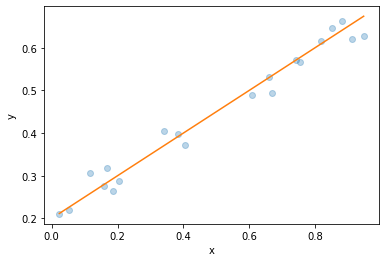

In [3]:
def plotaFunçãoDatasetRegressão(X, y, slop, intercept=0):
    """
    Plota um dataset de regressão com uma função definida por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    xmin = min(X)
    xmax = max(X)
    xs = np.linspace(xmin, xmax, num=2)
    ys = xs * slop+intercept
    plt.plot(xs,ys)

plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, slop, intercept)

In [4]:
def mse(yactual, ypred):
    return sum((yactual - ypred)**2)/len(yactual)

def rmse(yactual, ypred):
    return np.sqrt(mse(yactual, ypred))

0.024251263529876964
[0.20825559 0.47744064]


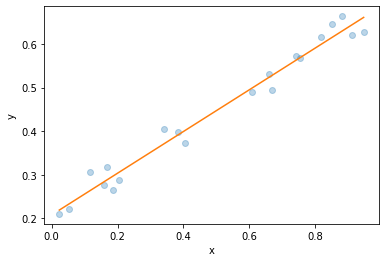

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron para regressão,
    treinado com a pseudo-inversa.
    """
    def __init__(self):
        self.w = None
        self.activation = lambda a: a
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.linalg.pinv(Xb) @ y

    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return Xb @ self.w

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(rmse(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

In [6]:
Xte, yte = criaDatasetRegressão(n=1000, slop=slop, intercept=intercept)

0.029434317386061507


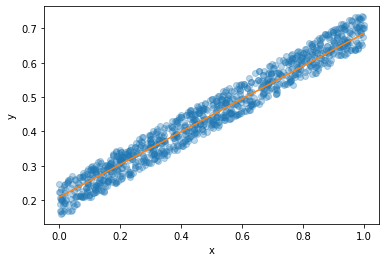

In [7]:
print(rmse(yte, perceptron.predict(Xte)))
plotaDatasetRegressão(Xte, yte)
plotaFunçãoDatasetRegressão(Xte, yte, perceptron.w[1:], perceptron.w[0])